# Red convolucional con kminst
_Por: Alfredo Villegas_

En el siguiente trabajo se implementará un modelo de clasificación de imágenes simple utilizando una CNN en un conjunto de datos a escoger.

La primera celda importa las librerías necesarias para trabajar con TensorFlow y Keras, así como las librerías Numpy y Matplotlib. Además importamos las funciones personales.

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

from kminst_models import kminst_model_conv, kminst_model_no_drop

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

En esta celda, se cargan los conjuntos de datos de entrenamiento y prueba para el problema de reconocimiento de dígitos en el dataset KMNIST.

In [2]:
train_images = np.load('kminst/kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kminst/kmnist-train-labels.npz')['arr_0']
test_images = np.load('kminst/kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kminst/kmnist-test-labels.npz')['arr_0']


Se muestra un ejemplo de una de las imágenes:

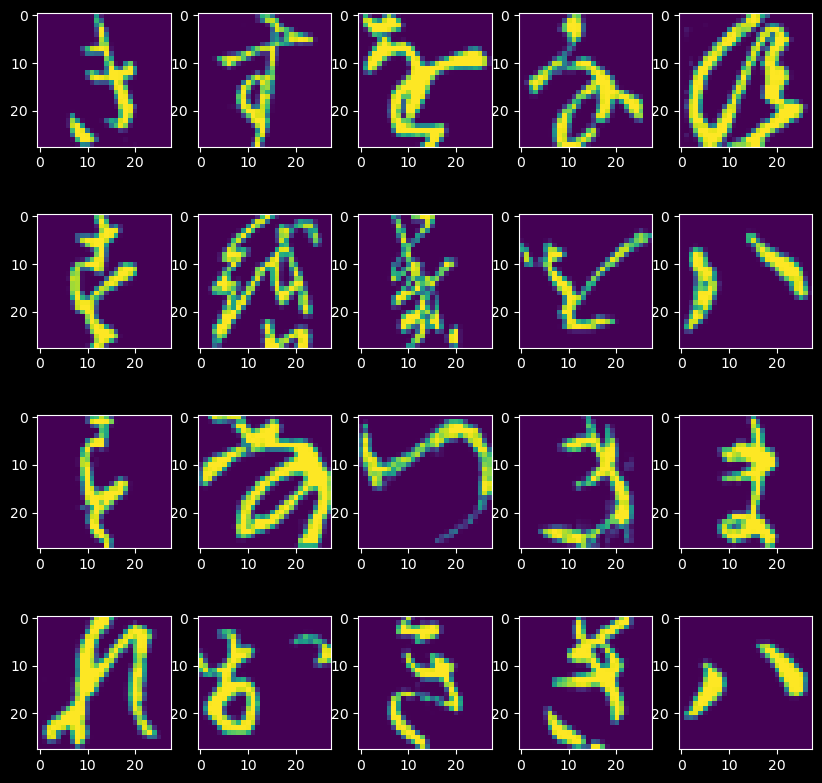

In [3]:
plt.figure(figsize=(10, 10))
for i in range(20):
    seed = None
    rng = np.random.default_rng(seed=seed)
    random_number = rng.integers(low=0,high=50000)
    kuzu_img = plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[random_number])

En esta celda, se llevan a cabo algunas transformaciones en los conjuntos de datos antes de ser utilizados para entrenar y probar el modelo:

1. "train_images" y "test_images" se normalizan dividiendo cada valor de píxel por 255. Esto se hace para escalar los valores de píxeles en el rango de 0 a 1, lo que facilita el procesamiento para el modelo de aprendizaje automático.

2. Luego, se modifica la forma de "train_images" y "test_images" para que sean compatibles con la entrada del modelo. Se cambia la forma de las matrices de 2D (28x28) a matrices de 3D (28x28x1), agregando una dimensión adicional que representa el número de canales de la imagen (en este caso, 1 canal porque son imágenes en escala de grises).

3. Las etiquetas de entrenamiento y prueba ("train_labels" y "test_labels") se convierten en forma de one-hot encoding utilizando la función "to_categorical" de Keras. Esto convierte las etiquetas enteras en vectores binarios de 10 dimensiones, donde cada dimensión representa una clase diferente. Esto es útil para entrenar un modelo de clasificación de múltiples clases.

En resumen, estas líneas de código normalizan las imágenes, ajustan sus formas y convierten las etiquetas en one-hot encoding, preparando los datos para su posterior uso en el entrenamiento del modelo de aprendizaje automático.

In [4]:
train_images = train_images.astype('float32') / 255 
test_images =  test_images.astype('float32') / 255 

train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

In [5]:
train_images.shape

(60000, 28, 28, 1)

En esta celda, se define la arquitectura del modelo de red neuronal convolucional utilizando la interfaz secuencial de Keras:
- Una capa de convolución con 64 filtros, tamaño de kernel 2x2, padding 'same' y función de activación ReLU. La capa espera una entrada de imágenes en formato (28x28x1).
- Una capa de MaxPooling con tamaño de pool 2x2 para reducir la dimensionalidad espacial.
- Una capa de dropout con una tasa de abandono del 30% para evitar el sobreajuste.
- Acá se agrega una capa adicional de convolución o más de una en función del parámetro 'convolution_deep'
  - Por defecto se agrega como mínimo una segunda capa de convolución con 64 filtros, tamaño de kernel 2x2, padding 'same' y función de activación ReLU.
  - Otra capa de MaxPooling y Dropout similar a las anteriores.
  - En caso de que convolution_deep sea mayor a 1, se repite el proceso aumentando la cantidad de filtros
- Se aplana (Flatten) la salida de las capas anteriores para convertirla en un vector unidimensional.
- Una capa densamente conectada con 256 unidades y función de activación ReLU.
- Una capa de dropout con una tasa de abandono del 50%.
- Finalmente, una capa de salida con 10 unidades y función de activación softmax.

Se entrena un modelo adicional sin dropout

In [6]:
model0 = kminst_model_conv(convolution_deep=0)
model1 = kminst_model_conv(convolution_deep=1)
model2 = kminst_model_conv(convolution_deep=2)
model3 = kminst_model_conv(convolution_deep=3)
model_no_drop = kminst_model_no_drop()

Este código a continuación configura el modelo para que utilice la función de pérdida categorical_crossentropy, el optimizador rmsprop y la métrica de precisión durante el entrenamiento.

In [7]:
model0.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model1.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model2.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model3.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model_no_drop.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)


Se almacena el historico del entrenamiento del modelo

In [8]:
hist0 = model0.fit(train_images, train_labels, batch_size=32, epochs=100)
hist1 = model1.fit(train_images, train_labels, batch_size=32, epochs=100)
hist2 = model2.fit(train_images, train_labels, batch_size=32, epochs=100)
hist3 = model3.fit(train_images, train_labels, batch_size=32, epochs=100)
hist_no_drop = model_no_drop.fit(train_images, train_labels, batch_size=32, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4173 - accuracy: 0.8715
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2284 - accuracy: 0.9322
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2158 - accuracy: 0.9372
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2270 - accuracy: 0.9348
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2299 - accuracy: 0.9353
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2266 - accuracy: 0.9345
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2255 - accuracy: 0.9354
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2166 - accuracy: 0.9385
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2134 - accuracy: 0.9394
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [14]:
print(model0.evaluate(test_images, test_labels, verbose=0)[1])
print(model1.evaluate(test_images, test_labels, verbose=0)[1])
print(model2.evaluate(test_images, test_labels, verbose=0)[1])
print(model3.evaluate(test_images, test_labels, verbose=0)[1])
print(model_no_drop.evaluate(test_images, test_labels, verbose=0)[1])

0.8501999974250793
0.7753999829292297
0.8496000170707703
0.7353000044822693
0.958299994468689


A continuación se expresa una gráfica del entrenamiento del modelo a lo largo de cada una de las épocas, se puede apreciar cómo la precisión va aumentando a medida que avanzan las primeras 10 épocas, luego empieza a disminuir debido a un overfitting o sobreentrenamiento. Además, se demuestra que agregar una capa de convolución adicional (es decir dos capas de profundidad en total) aumentando la cantidad de filtros en esta segunda capa puede conllevar un mejor aprendizaje, ya que la gráfica de color amarillo ('Train 2 conv layer') de dos capas de convolución muestra una precisión adicional durante toda la historia de entrenamiento, además agregar más capas es contraproducente puesto que al agregar una segunda y tercera capa no mejora el aprendizaje de forma considerable.

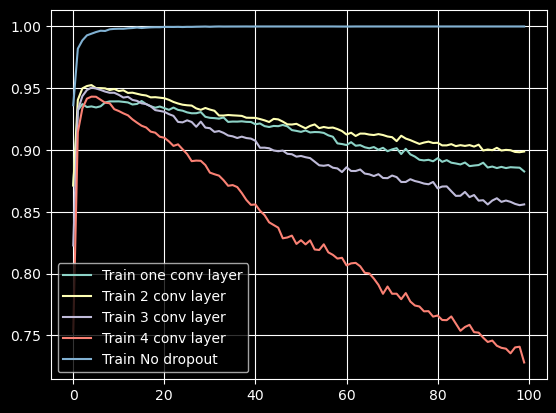

In [13]:
plt.plot(hist0.history["accuracy"], label="Train one conv layer")
plt.plot(hist1.history["accuracy"], label="Train 2 conv layer")
plt.plot(hist2.history['accuracy'], label='Train 3 conv layer')
plt.plot(hist3.history["accuracy"], label="Train 4 conv layer")
plt.plot(hist_no_drop.history["accuracy"], label="Train No dropout")

plt.legend()
plt.grid()
plt.show()

In [ ]:
tf.saved_model.save(model0, "./saved/model0.keras")
tf.saved_model.save(model1, "./saved/model1.keras")
tf.saved_model.save(model2, "./saved/model2.keras")
tf.saved_model.save(model3, "./saved/model3.keras")
tf.saved_model.save(model_no_drop, "./saved/model_no_drop.keras")